# Factors Affecting Loan Payments
## by Sylvia Ngari

## Investigation Overview

In this investigation, I wanted to look at some factors that may affect loan payment completion. The main variables considered are loan terms, previous delinquency status, income, and loan amounts.

## Dataset Overview

The dataset initially contained 81 attributes of 113,937 loans. This dataset was trimmed down to 10 columns and 50066 rows by considering only chargedoff and completed loans. Of the 10 columns, two were added that grouped loans based on loan amouns and whether the client had previous delinquencies.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosperloan_clean = pd.read_csv('prosper_clean.csv')

# change datatypes
from pandas.api.types import CategoricalDtype

term_type = CategoricalDtype(categories=['1 Year', '3 Years', '5 Years'], ordered=True)
loan_status_type = CategoricalDtype(categories=['Chargedoff', 'Completed'], ordered=True)
delq_type = CategoricalDtype(['Delinquent', 'Not Delinquent', 'Unavailable'], ordered=True)
income_type = CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                           '$75,000-99,999', '$100,000+', 'Not employed', 'Unavailable'], 
                               ordered=True)
loan_range_type = CategoricalDtype(categories=['$1,000-4,999', '$5,000-9,999', '$10,000-14,999', '$15,000-19,999',
                                                '$20,000-24,999', '$25,000-29,999', '$30,000-35,000'], ordered=True)

prosperloan_clean = prosperloan_clean.astype({'Term': term_type, 'LoanStatus': loan_status_type,
                                              'DelinquentStatus': delq_type,
                                              'LoanRange': loan_range_type,
                                              'IncomeRange': income_type,
                                              'LoanOriginationDate': 'datetime64',
                                              'ClosedDate': 'datetime64'})


In [3]:
 def plot_label(percent=False):
    '''
    Label bars in bar plot
    
    Parameters:
    -----------
    percent : bool
        Indicates whether labels are percentages
        
    Returns
    -------
    Text        
    '''
    if percent:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%')   
    else:
        for container in ax.containers:
            ax.bar_label(container)

# set plot style, color, and font sizes
sns.set(style='white')
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=13)
color = sns.color_palette()[0]

## Distribution of Loans by Term

3-year loans make up the bulk of Prosper loans

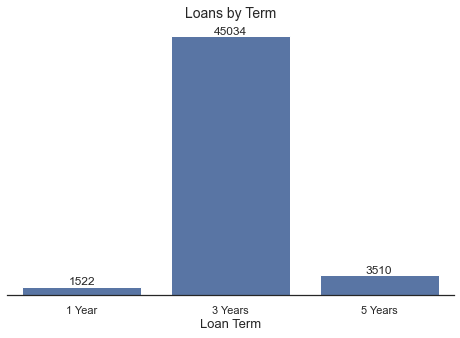

In [4]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Term', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Loan Term', title='Loans by Term');

## Loans by Loan Status

Most of the Prosper loans are fully paid off. 

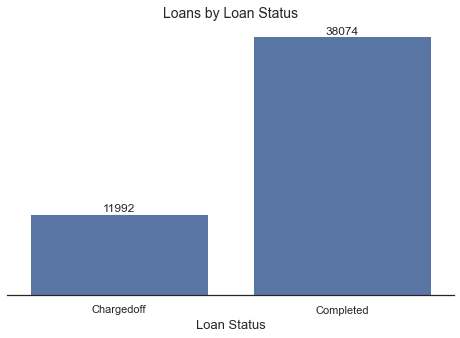

In [5]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='LoanStatus', color=color, data=prosperloan_clean);
plot_label(); sns.despine(left=True)
ax.set(yticklabels='', ylabel='', xlabel='Loan Status', title='Loans by Loan Status');

## Loan Status by Term

Across the three terms, Completed loans far exceed chargedoff loans.  
1-Year loans have the highest loan completion rate at 95.3%.  
The completion rate decreases as loan terms increase.

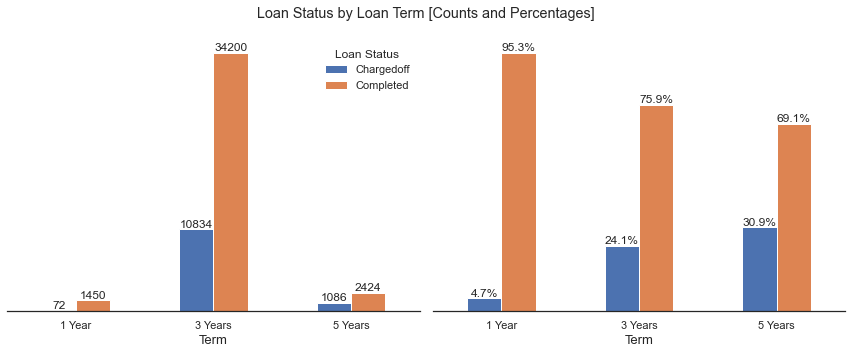

In [6]:
f,axes = plt.subplots(1,2, figsize=(12,5))
f.suptitle('Loan Status by Loan Term [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.Term, prosperloan_clean.LoanStatus).plot(kind='bar', ax=axes[0], rot=0)
ax.set(ylabel='', yticklabels='', xlabel='Term')
plot_label()
ax.legend(title='Loan Status', loc='best', frameon=False)

# percentages
ax = pd.crosstab(prosperloan_clean.Term, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], legend=None, rot=0)
ax.set(ylabel='', yticklabels='', xlabel='Term')
sns.despine(left=True); plot_label(percent=True)    
plt.tight_layout()

## Loan Status by Income

Most of the Prosper clients are in the \$25k-29.9k income bracket. Loan completion rate increases as income increases

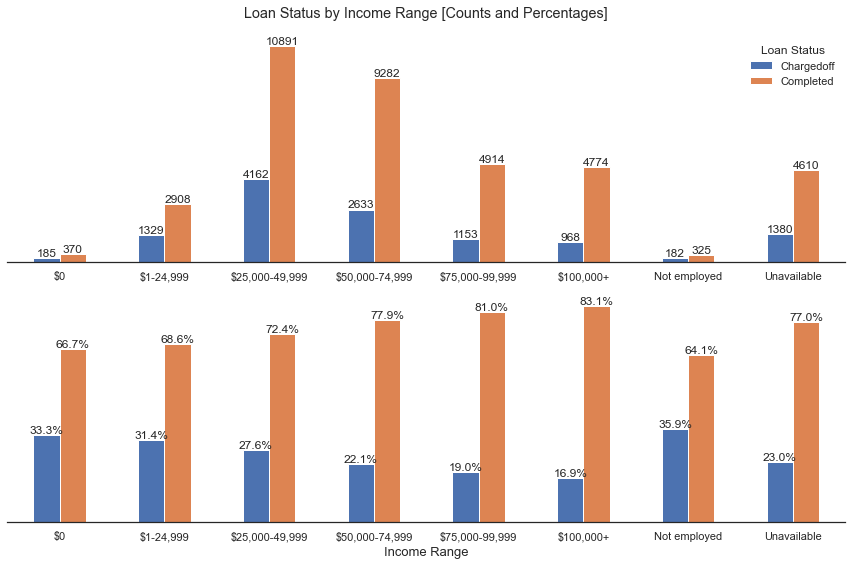

In [7]:
f, axes = plt.subplots(2,1, figsize=(12,8))
f.suptitle('Loan Status by Income Range [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.LoanStatus).plot(kind='bar',  rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='')
plot_label()
ax.legend(title='Loan Status', frameon=False);

# get percentages
ax = pd.crosstab(prosperloan_clean.IncomeRange, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], rot=0, legend=None)
ax.set(xlabel='Income Range', ylabel='', yticklabels='')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

## Loan Status by Loan Amount

Most prosper clients prefer loans in the \\$1000-4999 range. The number of loans decreases as loan amounts increase.   
For loans in between \\$1000 and \\$24999, the completion rate is roughly similar (74-77%).    
The highest loan bracket had full repayment while the range \$25k-29.9k had the lowest rate at 68%    

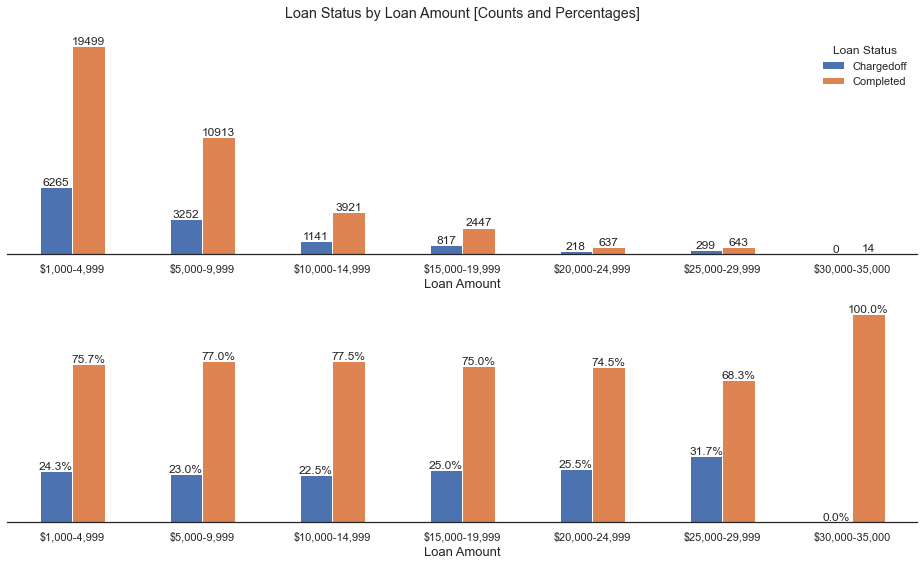

In [8]:
f, axes = plt.subplots(2,1, figsize=(13,8))
f.suptitle('Loan Status by Loan Amount [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.LoanRange, prosperloan_clean.LoanStatus).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='Loan Amount')
plot_label()
ax.legend(title='Loan Status', frameon=False);

# get percentages
ax = pd.crosstab(prosperloan_clean.LoanRange, prosperloan_clean.LoanStatus, normalize='index'
                ).mul(100).plot(kind='bar', ax=axes[1], rot=0, legend=None)
ax.set(xlabel='Loan Amount', ylabel='', yticklabels='')
sns.despine(left=True); plot_label(percent=True)

plt.tight_layout()

## Loan Status by Delinquency History

Most of the Prosper clients had no prior delinquencies. However, 21% of those without prior delinquencies didn't pay off their Prosper loans.  
Of the ones with past delinquencies, 63% paid off their Prosper loans

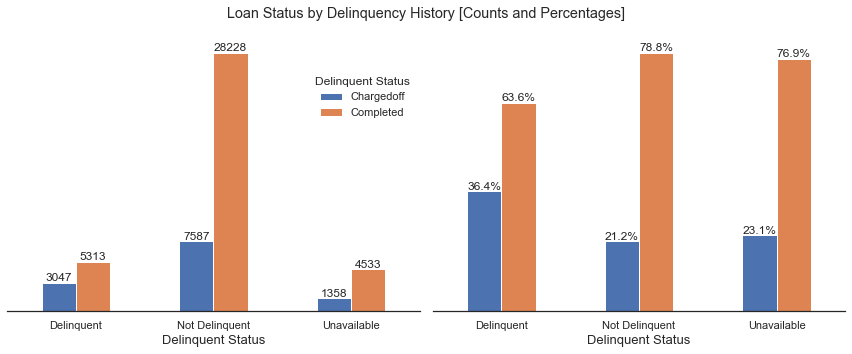

In [9]:
f,axes = plt.subplots(1,2, figsize=(12,5))
f.suptitle('Loan Status by Delinquency History [Counts and Percentages]')

ax = pd.crosstab(prosperloan_clean.DelinquentStatus, prosperloan_clean.LoanStatus
                ).plot(kind='bar', rot=0, ax=axes[0])
ax.set(ylabel='', yticklabels='', xlabel='Delinquent Status')
plot_label()
ax.legend(title='Delinquent Status', loc='upper right', bbox_to_anchor=(1,0.9), frameon=False)

# get percentages
ax = pd.crosstab(prosperloan_clean.DelinquentStatus, prosperloan_clean.LoanStatus, 
                 normalize='index').mul(100).plot(kind='bar', rot=0, ax=axes[1], legend=None)
ax.set(ylabel='', yticklabels='', xlabel='Delinquent Status' )
sns.despine(left=True); plot_label(percent=True)
plt.tight_layout()

# Thank You!

In [10]:
!jupyter nbconvert Prosper_Loans_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loans_Part_II.ipynb to slides
[NbConvertApp] Writing 779285 bytes to Prosper_Loans_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SYLVIE\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SYLVIE\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SYLVIE\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SYLVIE\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\SYLVIE\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filenam